In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Plot Feature Importance of an $n$-sphere
Corresponds to Fig.2(c).

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def R_j(xj, r0, rp):
    rp = np.abs(xj)
    sigma_rp = sigmoid(rp - r0)
    return np.abs(sigma_rp * (1 - sigma_rp) * 1)

r0 = 5
rp = 1  
cj = 0

# Generate values
xj = np.linspace(-10, 10, 1000)
Rj_values = R_j(xj, r0, rp)

Text(0, 0.5, '$R_j$')

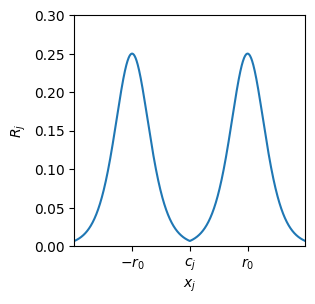

In [3]:
fig, ax = plt.subplots(figsize=(3,3))

plt.plot(xj, Rj_values, label='$R_j$')

ax.set_box_aspect(1)

ax.set_xticks([-5,0,5])
ax.set_xticklabels(['$-r_0$','$c_j$','$r_0$'])
plt.xlim(-10,10)
plt.xlabel('$x_j$')

plt.ylim(0.0,0.3)
plt.ylabel('$R_j$');

# Plot Training Restults
Creates plot for Fig.2(d). The results hardcoded here come from running ```n-sphere/experiments.ipynb```.

In [4]:
no_comb_mean = 0.954
no_comb_std = 0.020

ideal_mean = 0.993
ideal_std = 0.0

sum_mean = 0.87
sum_std = 0.008

sum_sq_mean = 0.8825
sum_sq_std = 0.001

multiply_mean = 0.95
multiply_std = 0.005
mult_sq_mean = 0.96
mult_sq_std = 0.003

In [5]:
palette = plt.get_cmap('tab20').colors

colors = [
    palette[0],
    palette[1],
    palette[2],
    palette[3],
    palette[4],
    palette[6]
]

In [6]:
means = np.array([
    sum_mean,
    sum_sq_mean,
    multiply_mean,
    mult_sq_mean,
    ideal_mean,
    no_comb_mean
])

error = np.array([
    sum_std,
    sum_sq_std,
    multiply_std,
    mult_sq_std,
    ideal_std,
    no_comb_std
])

techniques = [
    '$(x_j + x_k)$',
    '$(x_j + x_k)^2$',
    '$(x_j \\times x_k)$',
    '$(x_j \\times x_k)^2$',
    '$\\frac{1}{2} ( x_j^2 + x_k^2) $',
    'Independent',
    ]

x_pos = np.arange(len(techniques))

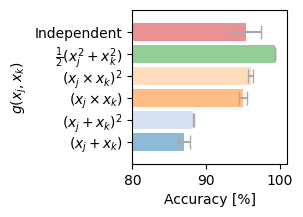

In [8]:
fig, ax = plt.subplots(figsize=(2,2))
ax.barh(
    x_pos,
    100*means,
    xerr=100*error,
    align='center',
    alpha=0.5,
    ecolor='darkgrey',
    color=colors,
    capsize=5
)

ax.set_yticks(x_pos)
ax.set_yticklabels(techniques, rotation = 0)

ax.set_xbound(80,101)
ax.set_ybound(-1,6)

ax.set_ylabel("$g(x_j, x_k)$")
ax.set_xlabel("Accuracy [%]");